## ~ Normal Check of application_data

In [3]:
#importing file and normal check of the csv data
import pandas as pd
app_data = pd.read_csv('application_data.csv')
app_data.info()
app_data.shape
app_data.columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
app_data.head()
app_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## ~ Data Quality Check and Missing-values

### ~ Finding % of missing values in all columns

In [4]:
null_values_percentage = app_data.isnull().sum() * 100 / len(app_data)
null_values_percentage

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### ~ Data Cleaning (Removing columns having null-values >= 50)

In [5]:
#calculating null values of all columns
null_values_percentage = null_values_percentage[null_values_percentage>=50]
null_values_percentage
cols_dropped=list(null_values_percentage[null_values_percentage >=50.00].index)
app_data.drop(labels=cols_dropped,axis=1,inplace=True)
app_data.columns
100*(app_data.isnull().sum()/len(app_data.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [6]:
# removing extra columns
Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI',
       'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'
        ,"OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]
app_data.drop(labels=Drop_col,axis=1,inplace=True)
100*(app_data.isnull().sum()/len(app_data.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

In [7]:
#fetching null values 
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

### ~ Imputing Columns having null values

In [8]:
# 1. occupation_type 
# Creating a new category called 'Unknown' : since the column is categorical - insights will be more clear
app_data.OCCUPATION_TYPE.value_counts()
app_data.loc[app_data['OCCUPATION_TYPE'].isnull(),"OCCUPATION_TYPE"] = "Unknown"

In [9]:
# 2. NAME_TYPE_SUITE : Replaced the null values with most common category
app_data.NAME_TYPE_SUITE.value_counts()
values = app_data["NAME_TYPE_SUITE"].mode()[0]
app_data.loc[app_data['NAME_TYPE_SUITE'].isnull(),"NAME_TYPE_SUITE"] = values

In [10]:
# 3. AMT_GOODS_PRICE : Since the column is numerical we can impute the null values with median value 
values1=app_data['AMT_GOODS_PRICE'].median()
app_data.loc[app_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values1

In [11]:
# 4. EXT_SOURCE_2 : Since the column is numerical we can impute the null values with median value 
app_data.loc[app_data['EXT_SOURCE_2'].isnull(),'EXT_SOURCE_2']=app_data['EXT_SOURCE_2'].median()

In [12]:
# 4. AMT_ANNUITY : Since this is numeric column - % of null values is also less - but important column hence replaced with median values.
app_data.AMT_ANNUITY.describe()
app_data.loc[app_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = app_data['AMT_ANNUITY'].median()
#no null values left!
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATI

### ~ Removing negative values from important columns and Changing data-types for more relevance

In [13]:
app_data["DAYS_EMPLOYED"] = abs(app_data["DAYS_EMPLOYED"])
app_data["DAYS_REGISTRATION"] = abs(app_data["DAYS_REGISTRATION"])
app_data["DAYS_BIRTH"] = abs(app_data["DAYS_BIRTH"])
app_data["CNT_CHILDREN"] = abs(app_data["CNT_CHILDREN"])

In [14]:
app_data["DAYS_REGISTRATION"] = app_data["DAYS_REGISTRATION"].astype(int)
app_data["AMT_INCOME_TOTAL"] = app_data["AMT_INCOME_TOTAL"].astype(int)
app_data["AMT_CREDIT"] = app_data["AMT_CREDIT"].astype(int)
app_data["AMT_ANNUITY"] = app_data["AMT_ANNUITY"].astype(int)

### ~ Checking for outliers (5 columns) :

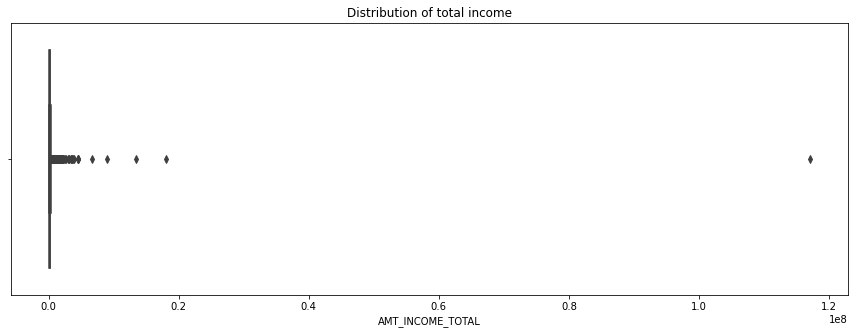

In [15]:
# 1. AMT_INCOME_TOTAL
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = [15, 5])
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.title('Distribution of total income')
plt.show()

### <font color='green'>Conclusion : Here there is one outlier at amount 1.17 on x-scale. We can get more clear idea by performing quantile on the column , we can conclude there is a bit more difference between 95th and 99th quanrantile. Hence , we can cap the outlier here.</font>

In [16]:
app_data.AMT_INCOME_TOTAL.quantile([0.1,0.2,0.5,0.7,0.9,0.95,0.99])

0.10     81000.0
0.20     99000.0
0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

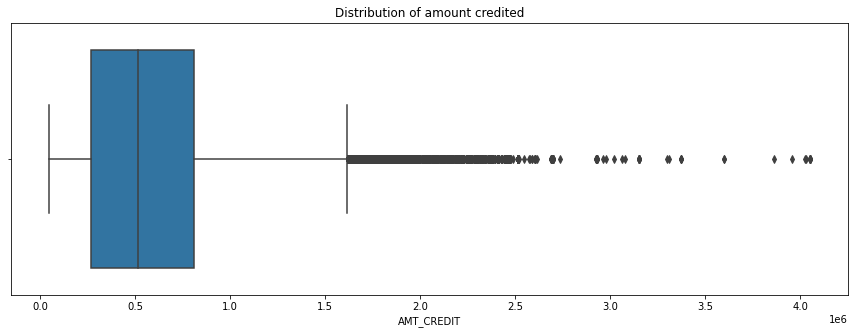

In [17]:
# 2. AMT_CREDIT
plt.figure(figsize = [15, 5])
sns.boxplot(app_data.AMT_CREDIT)
plt.title('Distribution of amount credited')
plt.show()

In [18]:
app_data.AMT_CREDIT.quantile([0.1,0.2,0.5,0.7,0.9,0.95,0.99])

0.10     180000.0
0.20     254700.0
0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

### <font color='green'>Conclusion : With variable AMT_CREDIT , mainly range of outliers are starting after the 99th quarantile. Hence , we can cap them off as well as credit amount can vary from person to person</font>

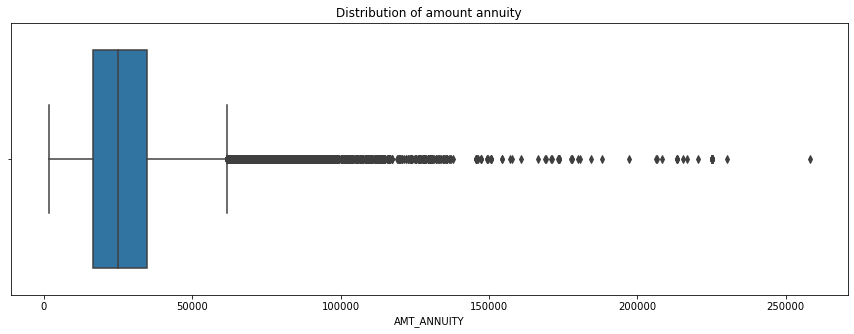

In [19]:
#3.AMT_ANNUITY
plt.figure(figsize = [15, 5])
sns.boxplot(app_data.AMT_ANNUITY)
plt.title('Distribution of amount annuity')
plt.show()

In [20]:
app_data.AMT_ANNUITY.quantile([0.1,0.2,0.5,0.7,0.9,0.95,0.9])
app_data.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.261682
std       14493.444921
min        1615.000000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.000000
Name: AMT_ANNUITY, dtype: float64

### <font color='green'>Conclusion : a. There is a big difference between 95th quantile and 99th quantile. b. There is not much difference between mean and median so we can impute outliers with median values</font>

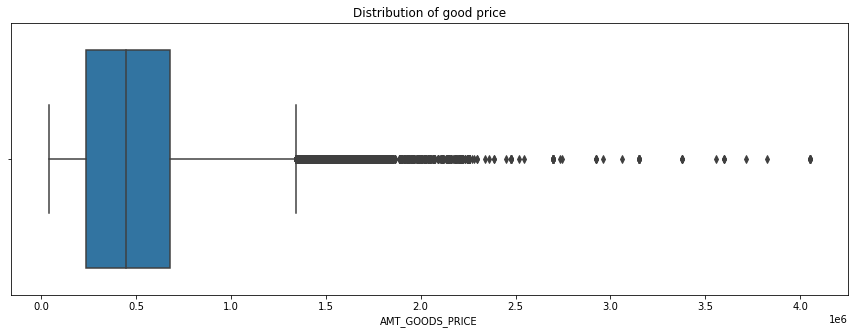

In [21]:
#4. AMT_GOODS_PRICE
plt.figure(figsize = [15, 5])
sns.boxplot(app_data.AMT_GOODS_PRICE)
plt.title('Distribution of good price')
plt.show()

In [22]:
app_data["AMT_GOODS_PRICE"] = app_data["AMT_GOODS_PRICE"].astype(int)
app_data.AMT_GOODS_PRICE.quantile([0.1,0.2,0.5,0.7,0.9,0.95,0.99])

0.10     180000.0
0.20     225000.0
0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

### <font color='green'>Conclusion : We can replace the outliers with median as these outliers are placed very close to each other</font>

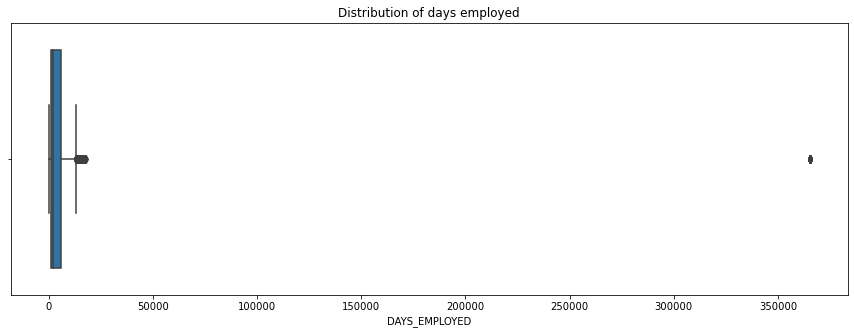

In [23]:
#5. DAYS_EMPLOYED
plt.figure(figsize = [15, 5])
sns.boxplot(app_data.DAYS_EMPLOYED)
plt.title('Distribution of days employed')
plt.show()

In [24]:
app_data.DAYS_EMPLOYED.describe()
app_data.DAYS_EMPLOYED.quantile([0.1,0.2,0.5,0.7,0.9,0.95,0.99])

0.10       392.0
0.20       749.0
0.50      2219.0
0.70      4435.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

### <font color='green'>Conclusion : There is one outlier at point 365243. We can cap off the outlier</font>

### ~ Binning Data

In [25]:
# 1.Creating bins for Credit amount
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']
app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,High
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium


In [26]:
#2. Creating bins for income amount
bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']
app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,Low


In [27]:
#3. Creating bins for days_birth
bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']
app_data['AGE_RANGE']=pd.cut(app_data['DAYS_BIRTH'],bins,labels=slot)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,Low,50-60


## ~ Analysis

### ~ Checking Imbalance 

In [28]:
# Distribution of customers on the basis of target variable
100*(app_data.TARGET.value_counts())/ (len(app_data))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [29]:
#Creating new data-sets with the help of target variable
target_1 = app_data[app_data['TARGET']==1]
target_0 = app_data[app_data['TARGET']==0]
target_0.head()
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium,20-30
26,100031,1,Cash loans,F,N,Y,0,112500,979992,27076,702000,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573,-1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,High,Low,50-60
40,100047,1,Cash loans,M,N,Y,0,202500,1193580,35028,855000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182,-1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,High,Medium,40-50
42,100049,1,Cash loans,F,N,N,0,135000,288873,16258,238500,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45,-4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,Low,Low,30-40
81,100096,1,Cash loans,F,N,Y,0,81000,252000,14593,252000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391,-4199,Unknown,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,Low,Low,60-70


### ~ Univariate Analysis (Numeric Columns)

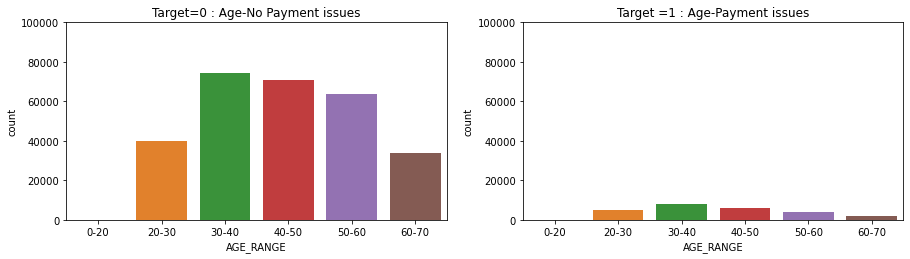

In [30]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(target_0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AGE_RANGE'])
plt.show()

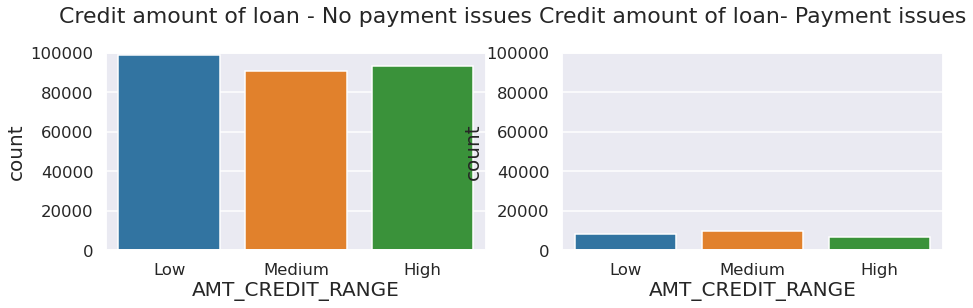

In [105]:
# Numerical column analysis wrt target variable
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(target_0['AMT_CREDIT_RANGE'])
sns.color_palette("hls", 8)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AMT_CREDIT_RANGE'])
sns.color_palette("hls", 8)
plt.show()

### ~ Univariate Analysis (Categorical Columns)

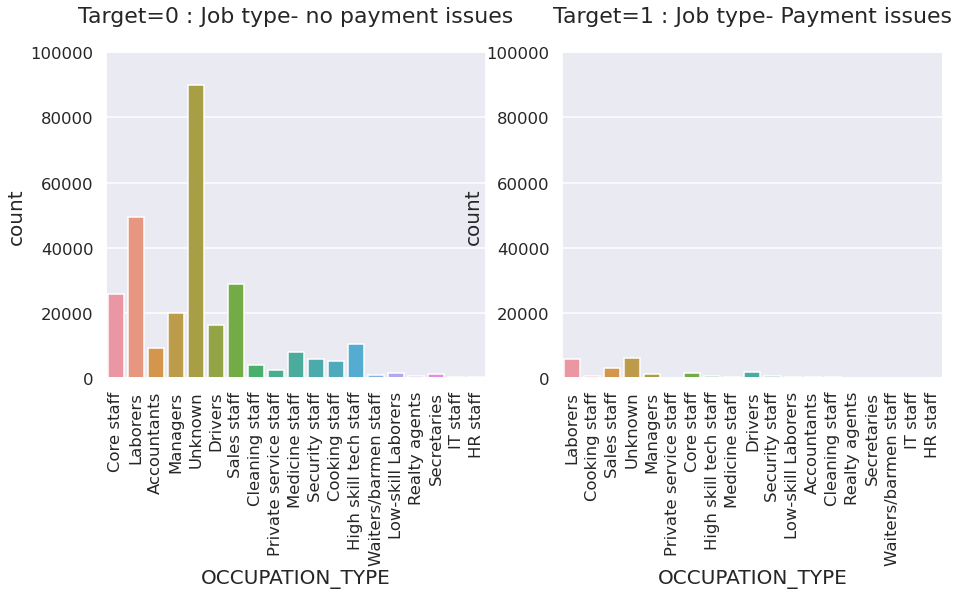

In [106]:
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(target_0['OCCUPATION_TYPE'])
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,100000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,100000)
plt.xticks(rotation = 90)
plt.show()

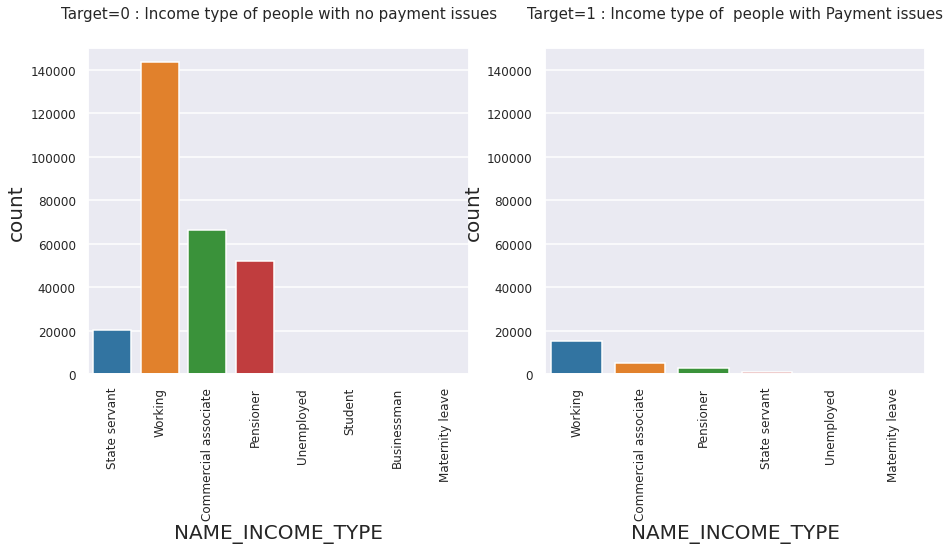

In [107]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'].dropna())
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'].dropna())
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()

### ~ Univariate Analysis (Continuos Variables)

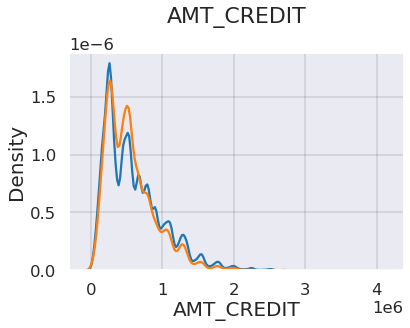

In [62]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_CREDIT'], hist = False, label='Good')# Target = 0 (no payment issue)
sns.distplot(target_1['AMT_CREDIT'], hist = False, label='Bad')# Taget = 1 (payment issue)
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.35, alpha=0.5) 
plt.show()

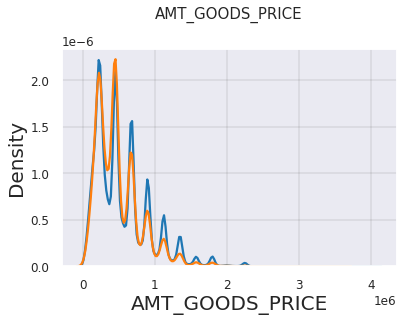

In [109]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_GOODS_PRICE'], hist = False,label= "good")# Target = 0
sns.distplot(target_1['AMT_GOODS_PRICE'], hist = False, label="bad")# Taget = 1
plt.title('AMT_GOODS_PRICE')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

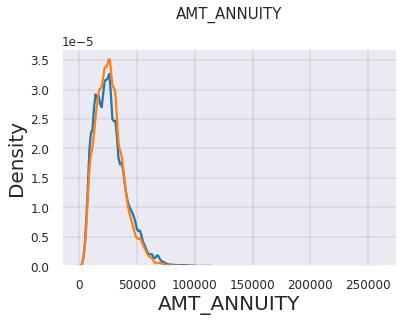

In [110]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_ANNUITY'], hist = False, label="Good")# Target = 0
sns.distplot(target_1['AMT_ANNUITY'], hist = False, label="Bad")# Taget = 1
plt.title('AMT_ANNUITY')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

### ~ Co-relation between continuos variables

In [43]:
pivot_table =pd.pivot_table(data= app_data,index='TARGET',values=("AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY"))
pivot_table

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL
TARGET,,,
0,27163.301808,602648.233298,169077.720860
1,26481.511501,557778.481934,165611.760081


<AxesSubplot:ylabel='TARGET'>

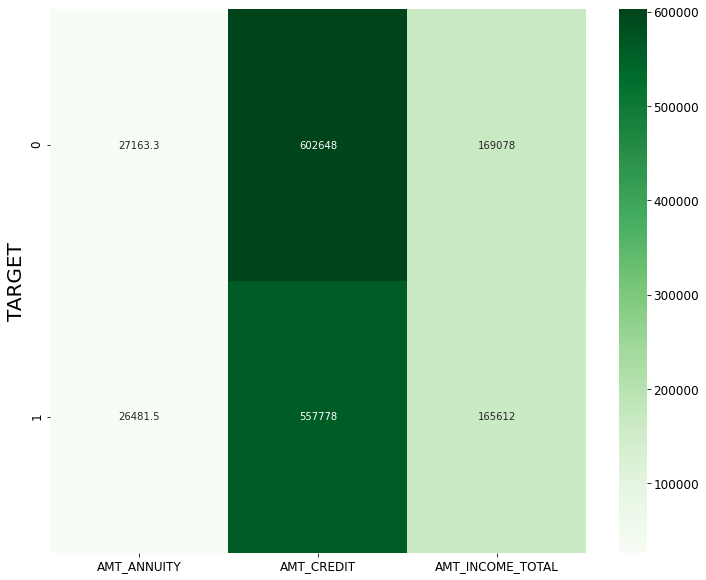

In [47]:
# framing heat-map with the help of pivot table
plt.figure(figsize = [12, 10])
sns.heatmap(pivot_table, cmap = "Greens",fmt="g",annot=True)

In [48]:
pivot_table_target0 =pd.pivot_table(data= target_0,index='OCCUPATION_TYPE',values=("AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY"))
pivot_table_target0

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL
OCCUPATION_TYPE,,,
Accountants,31078.518257,712089.975372,195530.034586
Cleaning staff,22959.350452,514651.985259,131073.825487
Cooking staff,25148.164695,543520.065540,138864.607136
Core staff,27607.906589,628181.517382,173485.955675
Drivers,29150.894399,618680.551891,187871.247030
HR staff,30178.239089,686600.588235,188940.444023
High skill tech staff,28705.807285,645990.845210,183591.094953
IT staff,29055.880081,649925.530488,216281.313008
Laborers,26451.570844,575075.288968,164758.097167


<AxesSubplot:ylabel='OCCUPATION_TYPE'>

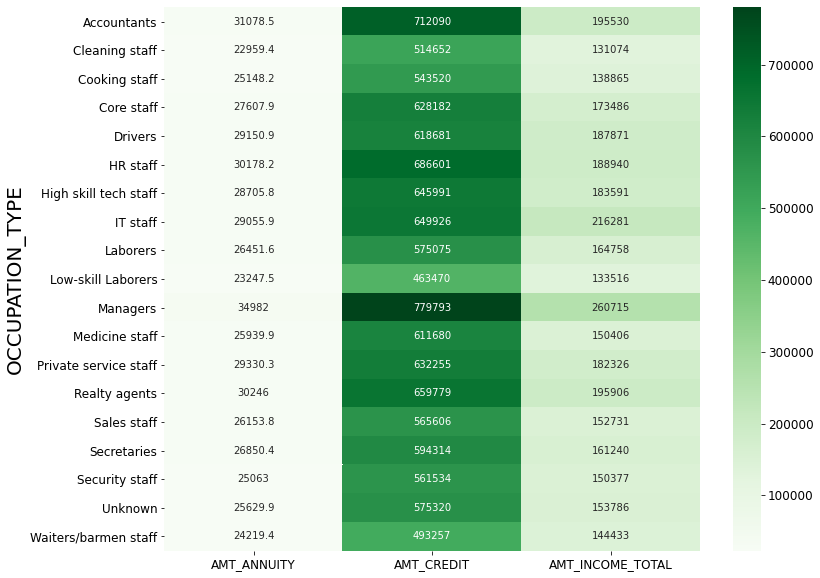

In [49]:
# Framing heat-map for target0 - customers
plt.figure(figsize = [12, 10])
sns.heatmap(pivot_table_target0, cmap = "Greens",fmt="g",annot=True)

In [50]:
pivot_table_target1 =pd.pivot_table(data= target_1,index='OCCUPATION_TYPE',values=("AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY"))
pivot_table_target1

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL
OCCUPATION_TYPE,,,
Accountants,29085.987342,663798.333333,175827.892405
Cleaning staff,22357.252796,476230.006711,128128.691275
Cooking staff,24519.953301,501909.587762,134382.608696
Core staff,26809.065017,581251.717491,160331.302647
Drivers,28443.084955,562645.239203,180281.353109
HR staff,30946.222222,661306.972222,188562.500000
High skill tech staff,27779.128388,596004.248217,171431.042796
IT staff,28513.382353,613913.676471,172720.588235
Laborers,26349.223707,532940.495718,179876.910243


<AxesSubplot:ylabel='OCCUPATION_TYPE'>

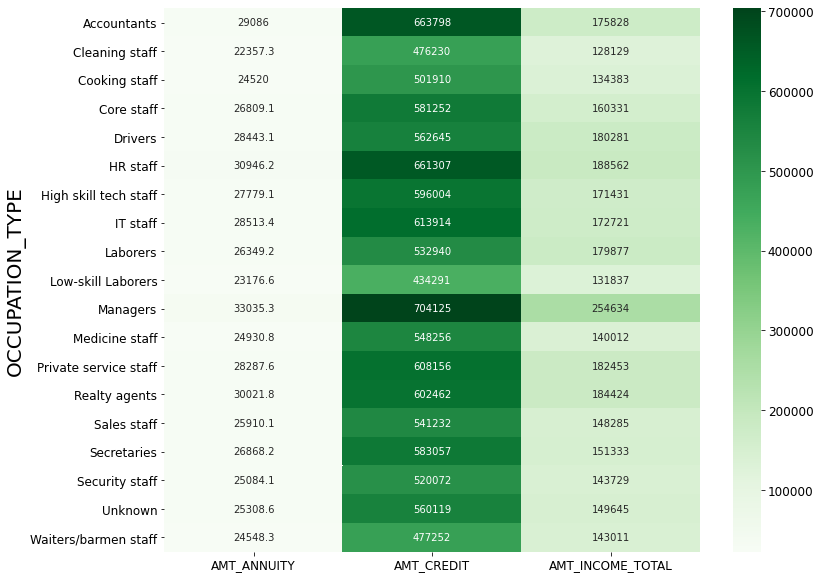

In [51]:
# Framing heat-map for target1 - customers
plt.figure(figsize = [12, 10])
sns.heatmap(pivot_table_target1, cmap = "Greens",fmt="g",annot=True)

## ~ Bivariate Analysis for target_0 and target_1

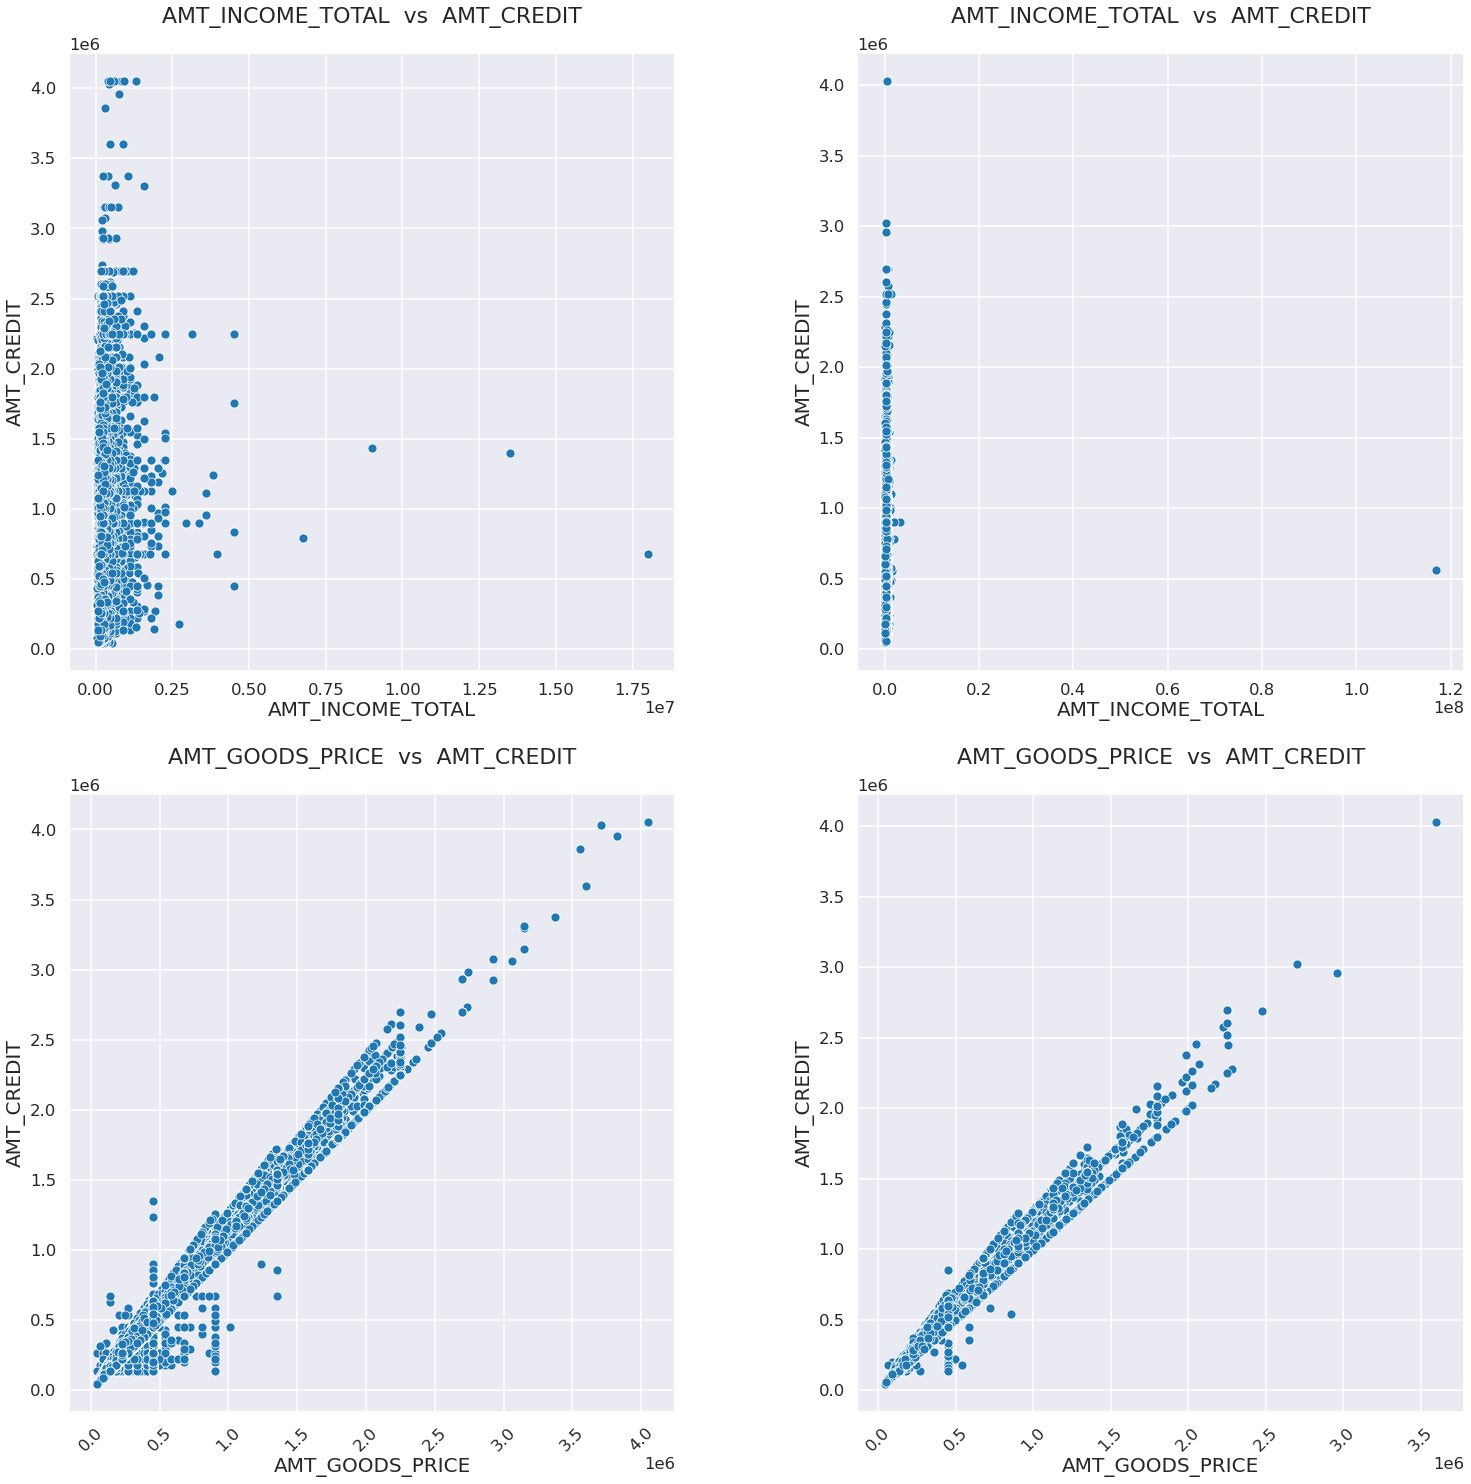

In [61]:
#Scatter plot for numeric columns

plt.figure(figsize = (25, 25))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,1)
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AMT_CREDIT,palette='colorblind')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT')


plt.subplot(2,2,2)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AMT_CREDIT,palette='colorblind')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT')


plt.subplot(2,2,3)
sns.scatterplot(target_0.AMT_GOODS_PRICE,target_0.AMT_CREDIT,palette='colorblind')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target_1.AMT_GOODS_PRICE,target_1.AMT_CREDIT,palette='colorblind')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT')
plt.xticks(rotation = 45)
plt.show()

### ~ Numerical Categorical Analysis

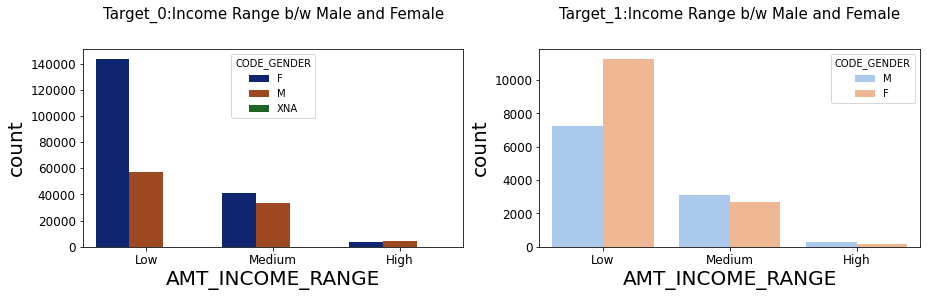

In [64]:
# Income range- Gender
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')
sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_0, palette='dark')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')
sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_1,palette='pastel')
plt.show()

### ~ Reading the "previous_application.csv"

In [38]:
prev_data=pd.read_csv("previous_application.csv")
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## ~ Data Cleaning

In [39]:
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

### ~ csv merging 

In [40]:
merged_data= pd.merge(app_data, prev_data, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000,180000,9000,180000,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799,-3015,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500,665892,24592,477000,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266,-3787,Unknown,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000,733315,39069,679500,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557,-3557,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,High,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000,540000,27000,540000,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236,-4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,Medium,Low,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000,540000,27000,540000,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236,-4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,Medium,Low,40-50,1529558,Cash loans,29053.215,450000.0,555723.0,NaN,450000.0,MONDAY,15,Y,1,NaN,NaN,NaN,Repairs,Refused,-449,Cash through the bank,LIMIT,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


## ~ Univariate Analysis 

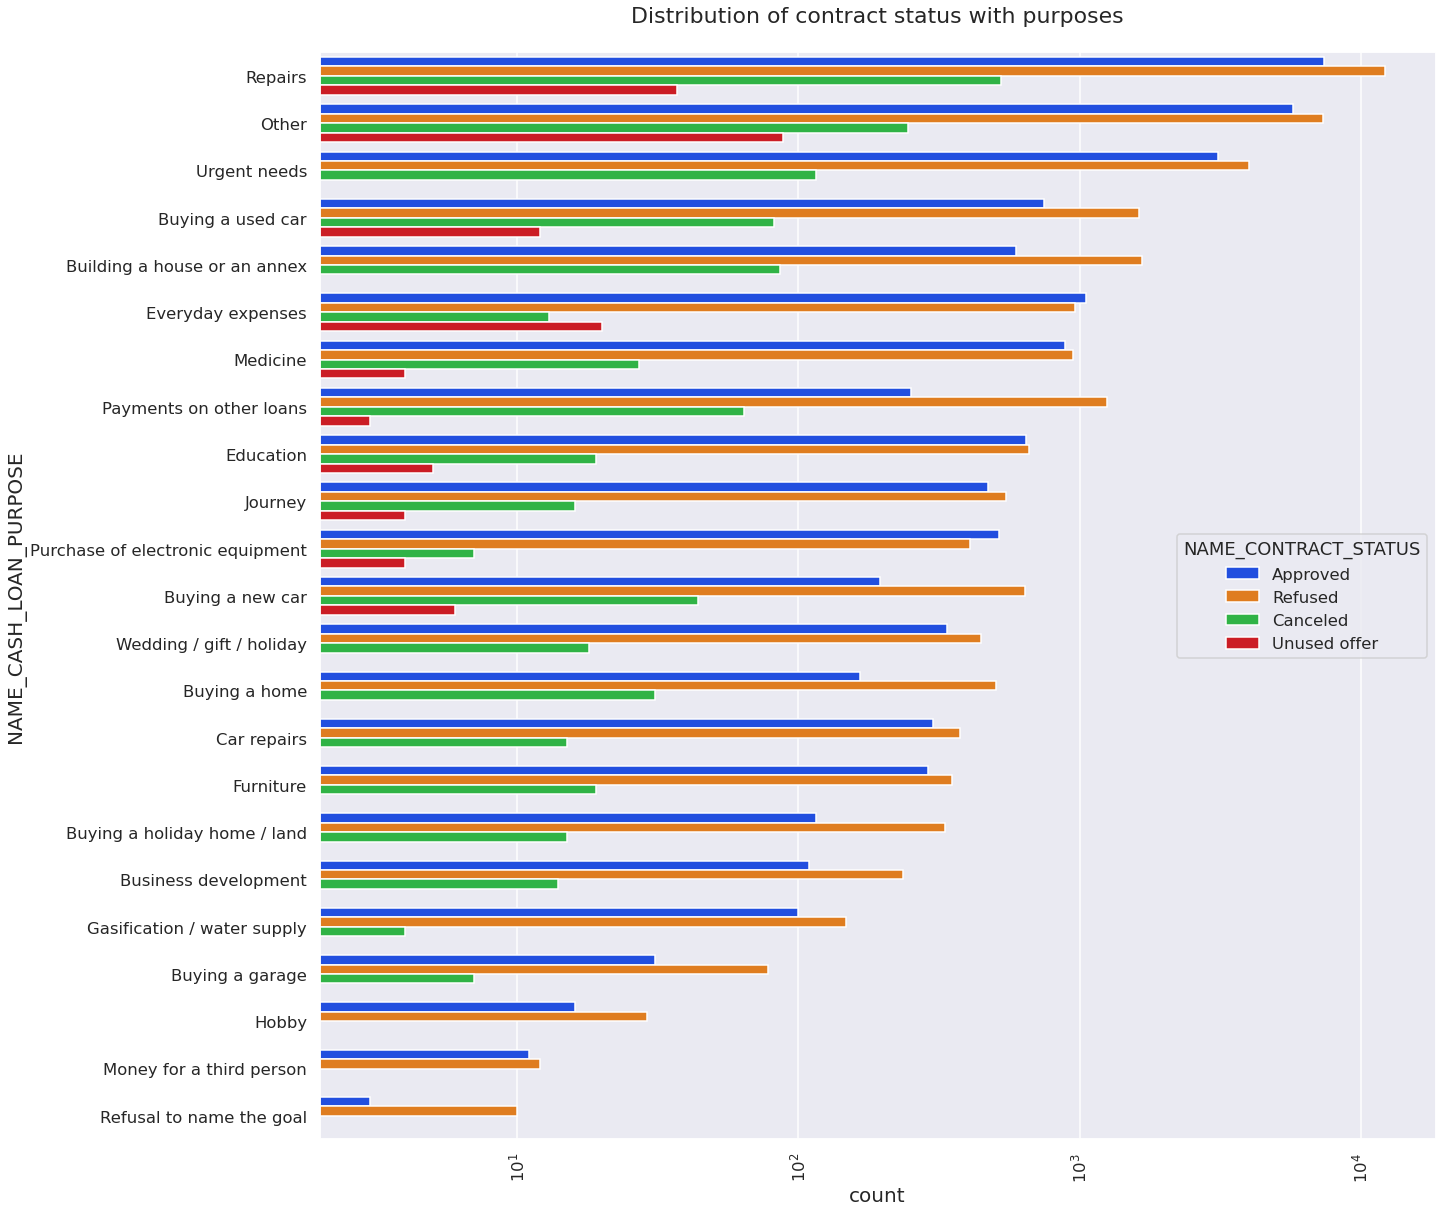

In [44]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = merged_data, y='NAME_CASH_LOAN_PURPOSE', order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='bright')

## ~ Bivariate Analysis

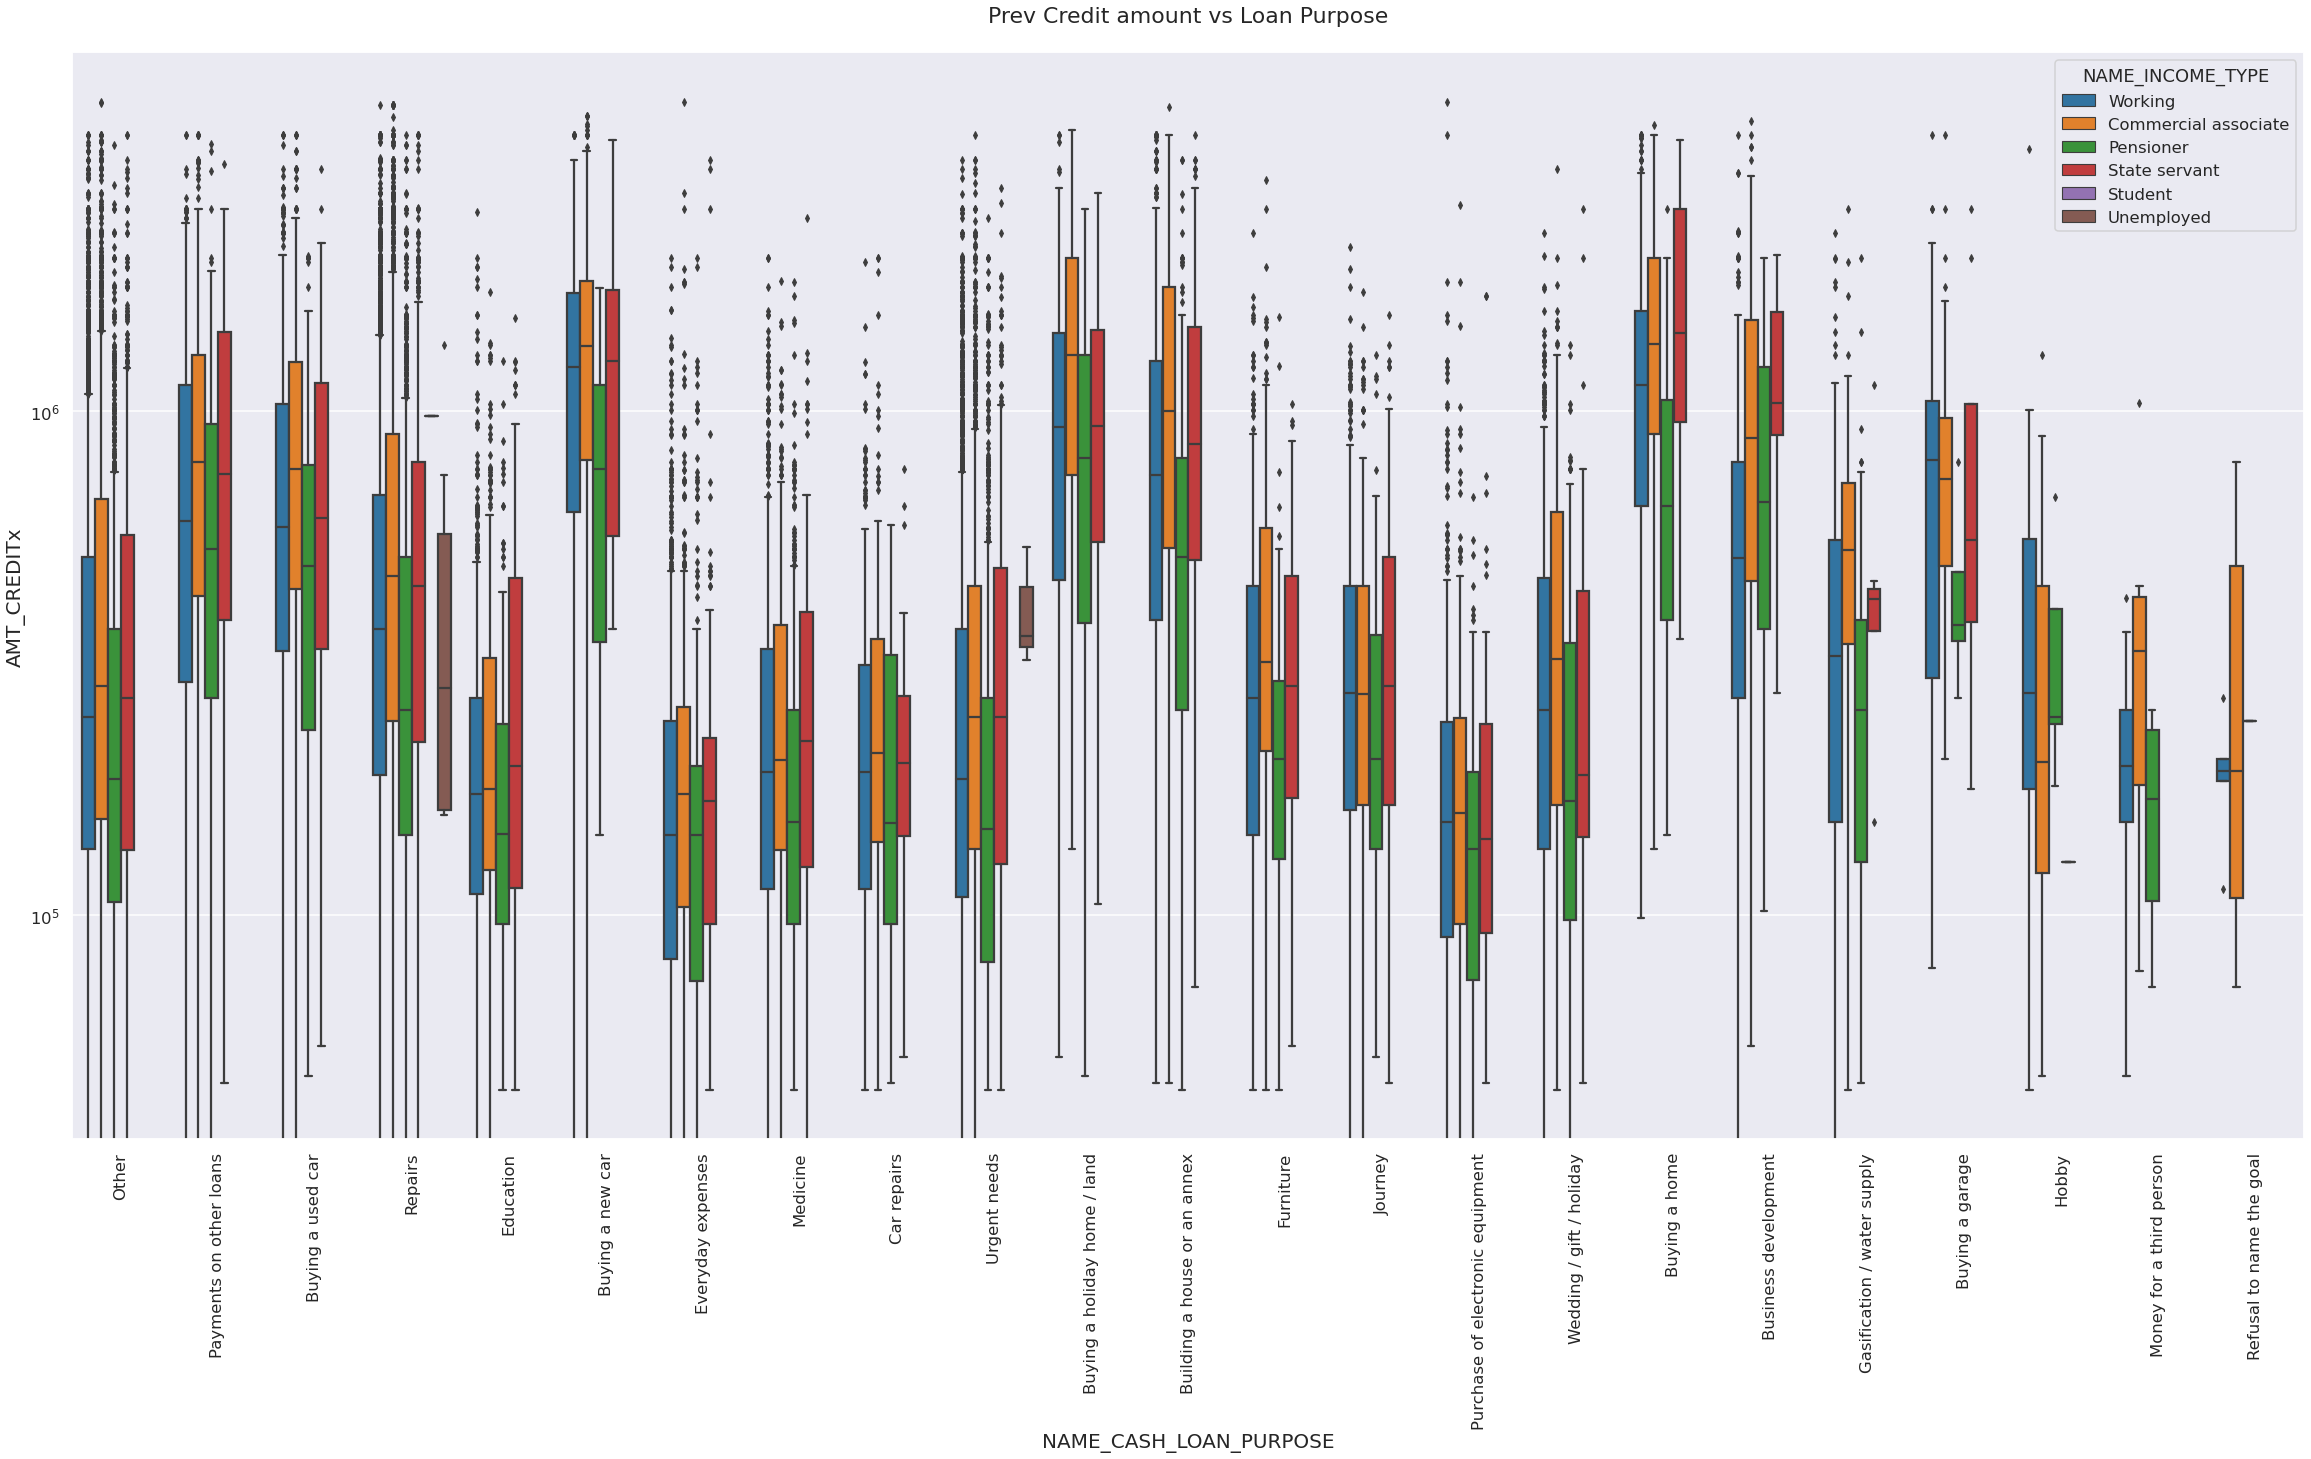

In [54]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(40,20))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =merged_data, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDITx',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()
